<a href="https://colab.research.google.com/github/fmbento/Jupyter-Notebooks_ad-hoc-solutions/blob/main/Transcri%C3%A7%C3%A3o_de_Videos_ou_Audios_com_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transcrição de Vídeos ou Áudios com IA

Última revisão: <br>
28 Janeiro 2024 -- uso do **Faster-Whisper** em vez do Whisper (MUITO mais rápido)

## Como?

##### Código / células começam na secção "Início" abaixo.

Executar as 3 células abaixo destas imagens. Na primeira execução vai aparecer este alerta:
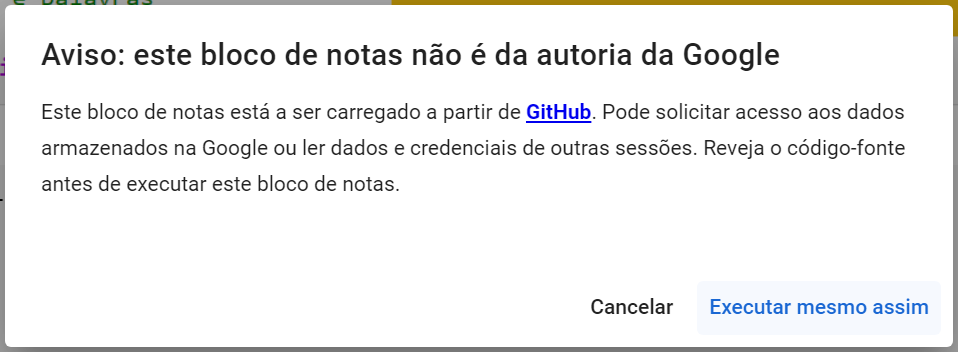
Este notebook é seguro e pode escolher "Executar mesmo assim".


**Nota**: para o primeiro ficheiro vai demorar alguns 2 ou 3 minutos mais, pois na primeira execução precisa de fazer o download do modelo, 3.09 GB.

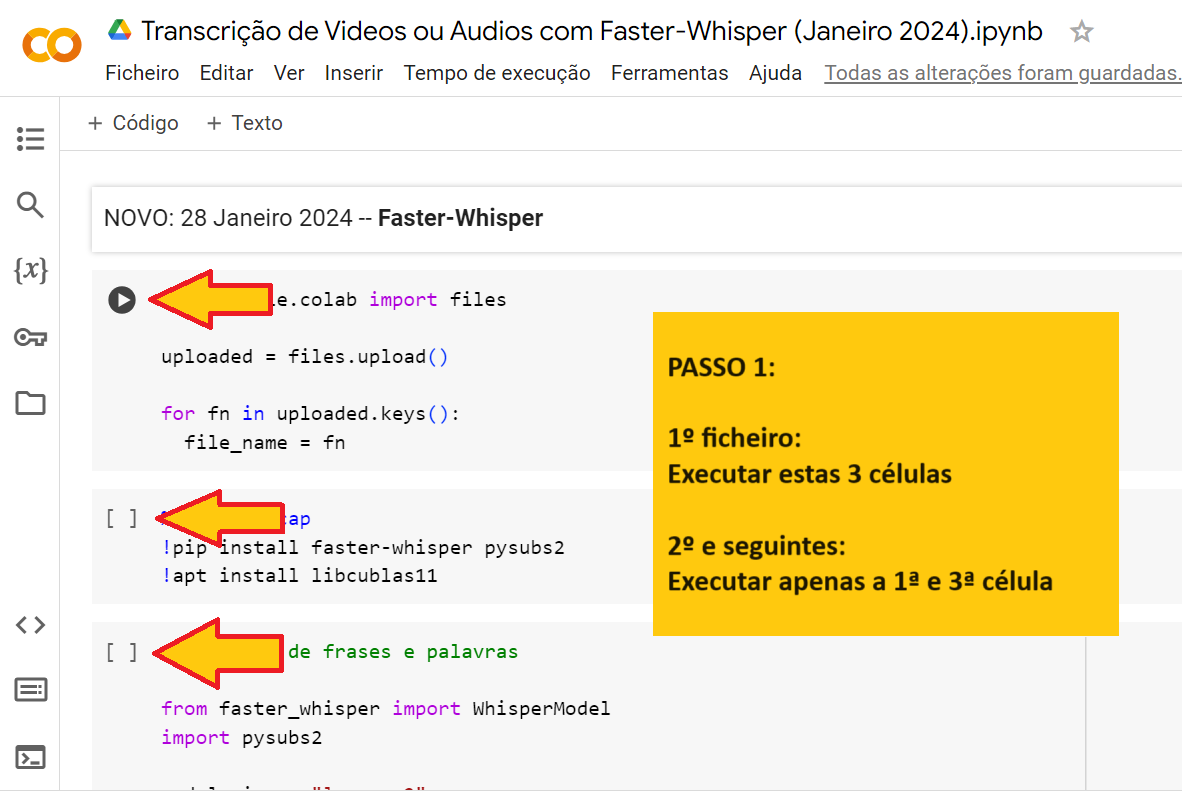

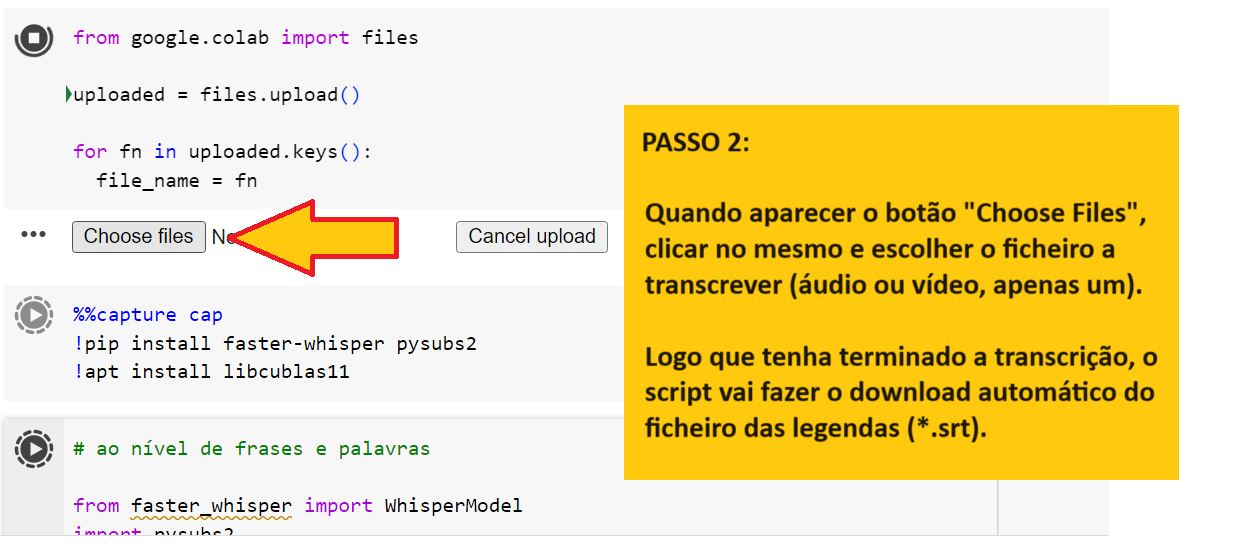



# Início:

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  file_name = fn

In [ ]:
%%capture cap
!pip install faster-whisper pysubs2
!apt install libcublas11

In [ ]:
# transcrição em frases

from faster_whisper import WhisperModel
import pysubs2

model_size = "large-v2"

# Run on GPU with FP16
model = WhisperModel(model_size, device="cuda", compute_type="float16")

# or run on GPU with INT8
# model = WhisperModel(model_size, device="cuda", compute_type="int8_float16")
# or run on CPU with INT8
# model = WhisperModel(model_size, device="cpu", compute_type="int8")

segments, info = model.transcribe(file_name, beam_size=5)


# Caso esteja em PT e se queira traduzir para Inglês (comentar a instrução anterior)
# segments, info = model.transcribe(file_name, beam_size=5, language="en")


print("Língua detectada: '%s' -- probabilidade de %f"% (info.language, info.language_probability))

results= []
results2= []

for segment in segments:
    try:
      print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))
      segment_dict = {'start':segment.start,'end':segment.end,'text':segment.text}
      results.append(segment_dict)
    except Exception as e:
        print(f"Oops... erro: {e}. Sem problema, vou avançar para a próxima frase.")

# Separar o nome do arquivo da sua extensão
base_name, extension = os.path.splitext(file_name)

# Altera o nome do ficheiro para conter o idioma reconhecido e a extensão .srt
srt_file_name = f"{base_name}.{info.language}.srt"

subs = pysubs2.load_from_whisper(results)
#save srt file
subs.save(srt_file_name)

import time
from google.colab import files
files.download(srt_file_name)

### **Extra: vídeo com legendas "queimadas"**. A primeira célula só é necessário ser corrida da primeira vez / primeiro ficheiro. Irá fazer o download automático do ficheiro, com "_legendado" adicionado ao nome do ficheiro original.

In [ ]:
%%capture
!pip install ffmpeg-python

In [ ]:
import ffmpeg
import os

def queimar_legendas(caminho_video, caminho_legendas, caminho_saida):
    # Carregar o vídeo
    video_entrada = ffmpeg.input(caminho_video)
    # Incorporar as legendas no vídeo
    video_saida = ffmpeg.output(video_entrada, caminho_saida, vf='subtitles=' + caminho_legendas)
    # Executar o comando
    video_saida.run()


# Separar o nome do arquivo da sua extensão
base_name, extension = os.path.splitext(file_name)

# Adiciona "legendado" antes da extensão
new_file_name = f"{base_name}_legendado_{info.language}{extension}"

# Chamar a função com os seus caminhos de vídeo, legendas e saída
queimar_legendas(file_name, srt_file_name, new_file_name)
files.download(new_file_name)


### **Extra: ficheiro de legendas em Inglês**: caso seja necessário uma versão do vídeo com as legendas "queimadas" nas imagens, basta correr a célula anterior a seguir a esta.


In [ ]:
# transcrição em frases, tradução automática para Inglês caso o idioma original não seja EN.

from faster_whisper import WhisperModel
import pysubs2

model_size = "large-v2"

# Run on GPU with FP16
model = WhisperModel(model_size, device="cuda", compute_type="float16")

# or run on GPU with INT8
# model = WhisperModel(model_size, device="cuda", compute_type="int8_float16")
# or run on CPU with INT8
# model = WhisperModel(model_size, device="cpu", compute_type="int8")

# segments, info = model.transcribe(file_name, beam_size=5)


# Caso esteja em PT e se queira traduzir para Inglês (comentar a instrução anterior)
segments, info = model.transcribe(file_name, beam_size=5, language="en")


print("Língua detectada: '%s' -- probabilidade de %f"% (info.language, info.language_probability))

results= []
results2= []

for segment in segments:
    try:
      print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))
      segment_dict = {'start':segment.start,'end':segment.end,'text':segment.text}
      results.append(segment_dict)
    except Exception as e:
        print(f"Oops... erro: {e}. Sem problema, vou avançar para a próxima frase.")

# Separar o nome do arquivo da sua extensão
base_name, extension = os.path.splitext(file_name)

# Altera o nome do ficheiro para conter o idioma reconhecido e a extensão .srt
srt_file_name = f"{base_name}.{info.language}.srt"

subs = pysubs2.load_from_whisper(results)
#save srt file
subs.save(srt_file_name)

import time
from google.colab import files
files.download(srt_file_name)